# Regrsión logística para predicciones bancarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("../../" , sep=";")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.shape

(4119, 21)

In [5]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [6]:
data["y"] = (data["y"]=="yes").astype(int) #Transformo los yes a 1 y los no a 0

In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [8]:
data["education"].unique() # Extraemos los únicos campos en la columna educación

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [9]:
# Reformamos la base de datos para que quede más bonita la documentacion y que siga la misma sintaxis.
# A esto se le llama "Data cleaning", notar que las educaciones básica están aglomeradas en basic

data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

In [10]:
data["education"].unique() #Cambiaron las columnas, son menos y más bonitas

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [11]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [12]:
data.groupby("y").mean() #Agrupa los yes y no y muestra el promedio

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [13]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Fracencia de combra')

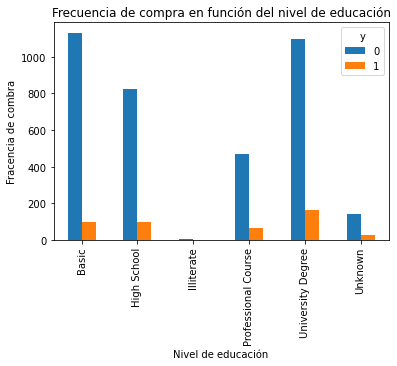

In [14]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Fracencia de combra")

Text(0, 0.5, 'Proporción de clientes')

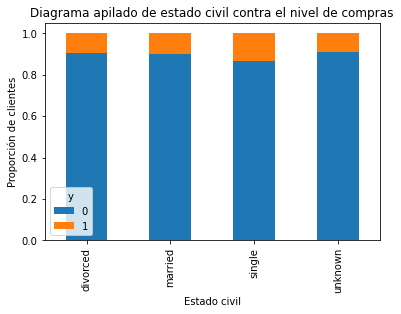

In [15]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked = True)
#Table.sum por filas as type float para que pueda dividir, y luego el resultado por columnas
#Si no dividimos, cada uno de los estados adopta su escala y no sirve para comparar 
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Frecuencia de compras')

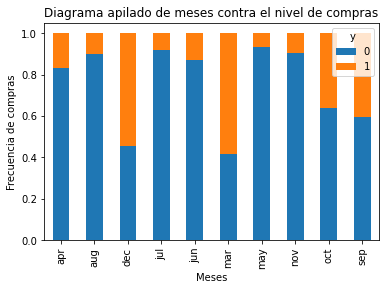

In [16]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked = True)
#Table.sum por filas as type float para que pueda dividir, y luego el resultado por columnas
#Si no dividimos, cada uno de los estados adopta su escala y no sirve para comparar 
plt.title("Diagrama apilado de meses contra el nivel de compras")
plt.xlabel("Meses")
plt.ylabel("Frecuencia de compras")

In [17]:
table

y,0,1
month,,
apr,179,36
aug,572,64
dec,10,12
jul,652,59
jun,462,68
mar,20,28
may,1288,90
nov,403,43
oct,44,25


In [18]:
table.div(table.sum(1).astype(float), axis=0)

y,0,1
month,,
apr,0.832558,0.167442
aug,0.899371,0.100629
dec,0.454545,0.545455
jul,0.917018,0.082982
jun,0.871698,0.128302
mar,0.416667,0.583333
may,0.934688,0.065312
nov,0.903587,0.096413
oct,0.637681,0.362319


Text(0, 0.5, 'Frecencia de combra')

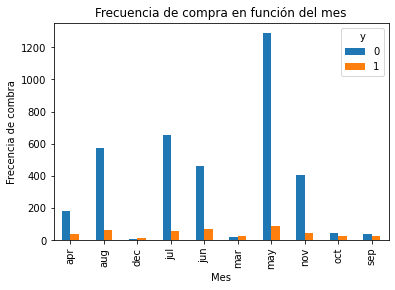

In [19]:
%matplotlib inline
pd.crosstab(data.month, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes")
plt.ylabel("Frecencia de combra")
#El mes del año parece ser muy importante, se obseva bastante en vacaciones.

Text(0, 0.5, 'Fracuencia de combra')

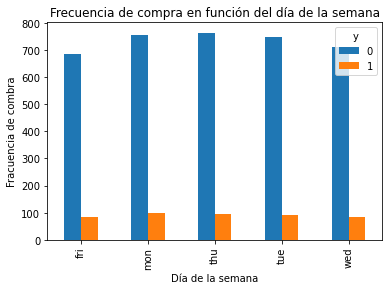

In [20]:
%matplotlib inline
pd.crosstab(data.day_of_week, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Fracuencia de combra")
#El producto financiero respecto al día no da ninguna pista

Text(0, 0.5, 'Cliente')

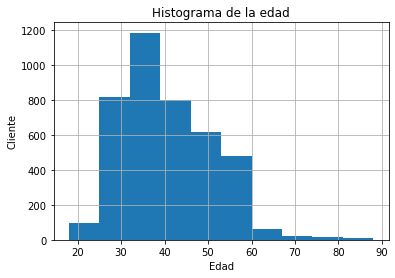

In [21]:
%matplotlib inline
#pd.crosstab(data.age, data.y).plot(kind="bar")
data.age.hist()
plt.title("Histograma de la edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")
#La mayoría de gente se encuentra entre los treinta y cuarenta años.

Text(0, 0.5, 'Frecuencia de compra')

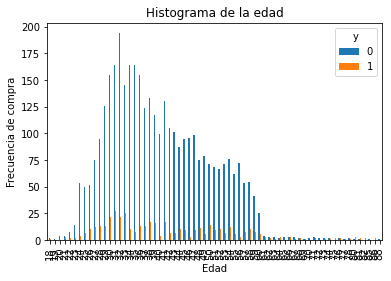

In [22]:
%matplotlib inline
pd.crosstab(data.age, data.y).plot(kind="bar")
plt.title("Histograma de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia de compra")

<AxesSubplot:xlabel='poutcome'>

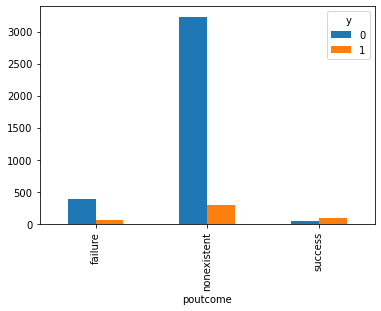

In [23]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

Partiendo de un análisis exploratorio de los datos para averigüar cuál es el más releveante, se encunetran
entre ellos la edad, el poutcome que se observa que las personas que dijeron que sí, seguramente repitan
y el nivel de educación y quizás el mes.

### Conversión de las variables categóricas a dummies

In [24]:
categories = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "cat" + "_" + category
    cat_dummies = pd.get_dummies(data[category], prefix=cat_list)
    data = data.join(cat_dummies)

In [25]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'cat_job_admin.',
       'cat_job_blue-collar', 'cat_job_entrepreneur', 'cat_job_housemaid',
       'cat_job_management', 'cat_job_retired', 'cat_job_self-employed',
       'cat_job_services', 'cat_job_student', 'cat_job_technician',
       'cat_job_unemployed', 'cat_job_unknown', 'cat_marital_divorced',
       'cat_marital_married', 'cat_marital_single', 'cat_marital_unknown',
       'cat_education_Basic', 'cat_education_High School',
       'cat_education_Illiterate', 'cat_education_Professional Course',
       'cat_education_University Degree', 'cat_education_Unknown',
       'cat_default_no', 'cat_default_unknown', 'cat_default_yes',
       'cat_housing_no', 'cat_housing_unknown', 'cat_housing_yes',
       'cat_loa

In [26]:
data_vars = data.columns.values.tolist()

In [27]:
to_keep = (v for v in data_vars if v not in categories) # Extraigo las variables que fueron dumizadas

In [28]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'cat_job_admin.', 'cat_job_blue-collar', 'cat_job_entrepreneur',
       'cat_job_housemaid', 'cat_job_management', 'cat_job_retired',
       'cat_job_self-employed', 'cat_job_services', 'cat_job_student',
       'cat_job_technician', 'cat_job_unemployed', 'cat_job_unknown',
       'cat_marital_divorced', 'cat_marital_married',
       'cat_marital_single', 'cat_marital_unknown', 'cat_education_Basic',
       'cat_education_High School', 'cat_education_Illiterate',
       'cat_education_Professional Course',
       'cat_education_University Degree', 'cat_education_Unknown',
       'cat_default_no', 'cat_default_unknown', 'cat_default_yes',
       'cat_housing_no', 'cat_housing_unknown', 'cat_housing_yes',
       'cat_loan_no', 'cat_loan_unknown', 'cat_loan_yes',
       'cat_contact_cellular', 'cat_contact_telephone', 'cat_month_apr',

### Selección de rasgos para el modelo

In [29]:
n = 10

In [30]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression(solver='lbfgs', max_iter=5000)

In [32]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data if v not in Y]

In [33]:
rfe = RFE(lr, n_features_to_select=n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

In [34]:
print(rfe.support_)

[False False False False  True False False False  True False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False  True False False
  True  True  True False False False False False False False  True False
  True]


In [35]:
print(rfe.ranking_)

[40 49 25 51  1 22 29 28  1 47 27  6  2 42  3 44  1  8 39 35 21 11 23 37
 34 50 30 18  9 26 36 12 41 38 52 14 20 31 43 10 19 13  5  1  7  1 45  4
  1  1  1 16 24 46 32 48 33 15  1 17  1]


In [36]:
z = zip(bank_data_vars, rfe.support_, rfe.ranking_)

In [37]:
list(z)

[('age', False, 40),
 ('duration', False, 49),
 ('campaign', False, 25),
 ('pdays', False, 51),
 ('previous', True, 1),
 ('emp.var.rate', False, 22),
 ('cons.price.idx', False, 29),
 ('cons.conf.idx', False, 28),
 ('euribor3m', True, 1),
 ('nr.employed', False, 47),
 ('y', False, 27),
 ('cat_job_admin.', False, 6),
 ('cat_job_blue-collar', False, 2),
 ('cat_job_entrepreneur', False, 42),
 ('cat_job_housemaid', False, 3),
 ('cat_job_management', False, 44),
 ('cat_job_retired', True, 1),
 ('cat_job_self-employed', False, 8),
 ('cat_job_services', False, 39),
 ('cat_job_student', False, 35),
 ('cat_job_technician', False, 21),
 ('cat_job_unemployed', False, 11),
 ('cat_job_unknown', False, 23),
 ('cat_marital_divorced', False, 37),
 ('cat_marital_married', False, 34),
 ('cat_marital_single', False, 50),
 ('cat_marital_unknown', False, 30),
 ('cat_education_Basic', False, 18),
 ('cat_education_High School', False, 9),
 ('cat_education_Illiterate', False, 26),
 ('cat_education_Professional

In [38]:
cols_auto=[] #Detecto automáticamente las columnas que son trues.
j=0
for i in rfe.support_:
    if i == True:
        cols_auto.append(bank_data_vars[j])
    j+=1
cols_auto

['previous',
 'euribor3m',
 'cat_job_retired',
 'cat_contact_telephone',
 'cat_month_aug',
 'cat_month_jun',
 'cat_month_mar',
 'cat_month_may',
 'cat_day_of_week_wed',
 'cat_poutcome_nonexistent']

In [39]:
X = bank_data[cols_auto]
Y = bank_data["y"]

### Implementación del modelo en Python con statsmodels.api

In [40]:
import statsmodels.api as sm

In [41]:
logit_model = sm.Logit(Y,X)

In [42]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.288150
         Iterations 7


In [43]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                  Logit              Pseudo R-squared:   0.166     
Dependent Variable:     y                  AIC:                2393.7830 
Date:                   2022-04-05 10:48   BIC:                2457.0166 
No. Observations:       4119               Log-Likelihood:     -1186.9   
Df Model:               9                  LL-Null:            -1422.9   
Df Residuals:           4109               LLR p-value:        5.4907e-96
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         7.0000                                           
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
previous                  0.1049   0.0696   1.5074 0.1317 -0.0315  0.2414
euribor3m                -0.5361   0.0349 -15.3524 0.0000 -0.6045 -0.4677
cat_job_retired           0.2227   0.2170   1.0266 0.3046 -0.2025  0.6480
cat_contact_telephone    -0.2189   0.1604  -1.3643 0.1725 -0.5334  0.0956
cat_month_aug            -0.0373   0.1660  -0.2247 0.8222 -0.3627  0.2880
cat_month_jun             0.4573   0.1778   2.5714 0.0101  0.1087  0.8058
cat_month_mar             1.0874   0.3117   3.4890 0.0005  0.4766  1.6983
cat_month_may            -1.0856   0.1340  -8.0991 0.0000 -1.3483 -0.8229
cat_day_of_week_wed       0.0651   0.1393   0.4675 0.6402 -0.2079  0.3382
cat_poutcome_nonexistent -0.3325   0.1295  -2.5678 0.0102 -0.5863 -0.0787
=========================================================================

"""

### Implementación del modelo en Python con scikit-learn

In [44]:
from sklearn import linear_model

In [45]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression()

In [46]:
logit_model.score(X,Y)

0.8956057295460063

In [47]:
1-Y.mean()

0.8905074047098811

In [48]:
logit_model.intercept_

array([-0.89307167])

In [49]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5129138891231024]
1,euribor3m,[-0.4890961525383065]
2,cat_job_retired,[0.32914109457357243]
3,cat_contact_telephone,[-0.2581653215873337]
4,cat_month_aug,[0.017839720526623234]
5,cat_month_jun,[0.5198545025764586]
6,cat_month_mar,[1.1438401594864749]
7,cat_month_may,[-0.894992566050582]
8,cat_day_of_week_wed,[0.11489898171487398]
9,cat_poutcome_nonexistent,[0.3543769540380019]


La ecuación que quedaría por lo tanto sería:

$P = \frac{1}{1 + e^{-(-0.89307167+0.5129138891231024*previous-0.4890961525383065*euribor3m+0.32914109457357243*cat_job_retired
-0.2581653215873337*cat_contact_telephone+0.017839720526623234*cat_month_aug+0.5198545025764586*cat_month_jun+1.1438401594864749*cat_month_mar-0.894992566050582*cat_month_may+0.11489898171487398*cat_day_of_week_wed+0.3543769540380019*	cat_poutcome_nonexistent)}} $

# Validación del modelo logístico

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

X_train y X_test van a ser las X para entrenamiento, que ocupará el 70% de la base de datos para entrenamiento y el 30% para testing, y la Y_train igualmente será el 70% entrenamiento y 30% prueba o testing

In [52]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [53]:
probs = lm.predict_proba(X_test)

In [54]:
probs

array([[0.93973147, 0.06026853],
       [0.88585785, 0.11414215],
       [0.93692207, 0.06307793],
       ...,
       [0.68264111, 0.31735889],
       [0.9840339 , 0.0159661 ],
       [0.56909263, 0.43090737]])

La primer columna es la probabilidad, cómo de seguro estoy de lo que estoy diciendo, la segunda nos dá la probabilidad del valor de salida. Por defecto, si es mayor de 0,5 es más probable que compre y si es menor que 0,5 es mayor la probabilidad de no compra.

In [55]:
prediction = lm.predict(X_test)

In [56]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

Como vemos, prediction es un array, donde el threshold (límite) es 0,5 o sea, si es mayor que 0,5 lo clasifica como 1 y si es menor que 0,5 lo clasifica como 0. Esto lo hace automáticamente ya que el **THRESHOLD** está siempre seteado en 0,5 por defecto.

$ Y_p = \begin{cases}0&si\ p\leq0.5\\1&si\ p >0.5\end{cases} $

Si queremos cambiar este **THRESHOLD** a otro nivel, podemos decidir nosotros el nivel.

$ \varepsilon\in (0,1),  Y_p = \begin{cases}0&si\ p\leq\varepsilon\\1&si\ p >\varepsilon\end{cases} $

En nuestro caso, si un cliente tiene más de un 10% de posibilidad de compra se le puede catalogar como éxito, ya que sólo el 10% por lo que vimos compra. Entonces se le asigna a la etiquteta probable comprador.

In [57]:
prob = probs[:,1]

In [58]:
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["Prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head(5)

,0,Prediction
0,0.060269,0
1,0.114142,1
2,0.063078,0
3,0.050765,0
4,0.081756,0


In [59]:
pd.crosstab(prob_df.Prediction, columns = "count")

col_0,count
Prediction,
0,852
1,384


In [60]:
390/len(prob_df)*100

31.55339805825243

In [61]:
threshold = 0.15
prob_df["Prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.Prediction, columns = "count")

col_0,count
Prediction,
0,1020
1,216


In [62]:
threshold = 0.3
prediction1=np.where(prob_df[0]>threshold, 1, 0)
prediction1

array([0, 0, 0, ..., 1, 0, 1])

In [63]:
225/len(prob_df)*100

18.203883495145632

In [64]:
threshold = 0.12
prob_df["Prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.Prediction, columns = "count")

col_0,count
Prediction,
0,945
1,291


In [65]:
879/len(prob_df)*100

71.11650485436894

In [66]:
from sklearn import metrics

In [67]:
metrics.accuracy_score(Y_test, prob_df["Prediction"]) #Con este framework nos dice cuántos casos le acertamos del Y_test

0.7872168284789643

La eficacia de este modelo, utilizando un conjunto de entremaniento y uno de testing subió del 89% a un 90%.

## Validación cruzada en Python

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)

In [70]:
scores

array([0.90291262, 0.88834951, 0.90291262, 0.90048544, 0.89805825,
       0.8907767 , 0.88349515, 0.89563107, 0.89320388, 0.88807786])

In [71]:
scores.mean()

0.8943903101599225

Con este método, cv es el número de iteraciones que tendrá el modelo, por lo que si sacamos el promedio obtendremos lo que se vió en la teoría, y ciertamente es un buen valor. Con los resultados vistos, podemos decir que es un buen método.

### LOOCV 

In [72]:
from sklearn.model_selection import LeaveOneOut

In [73]:
loo = LeaveOneOut()
loo.get_n_splits(X)

4119

In [74]:
print(loo)

LeaveOneOut()


In [75]:
scores = cross_val_score(linear_model.LogisticRegression(),X,Y, scoring='accuracy', cv=loo, n_jobs=-1)

In [76]:
len(scores)

4119

In [77]:
scores

array([1., 1., 1., ..., 1., 1., 1.])

In [78]:
scores.mean()

0.8956057295460063

Como hemos visto, con el método del LOOCV (Leave One Out Cross Validation), el equipo tuvo que realizar 4119 iteraciones para que el resultado mejore de 0.894 a 0.895, lo cual es mucho sacrificio computacional para la poca mejora lograda.

## Matrices de Confusión y curvas ROC

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [225]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [226]:
probs = lm.predict_proba(X_test)

In [227]:
prob = probs[:,1]
prob_df=pd.DataFrame(prob)
threshold = 0.1
prob_df["Prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df["Actual"] = list(Y_test) # Con esto Y_test perderá los identificadores antiguos y aparecerán los 0 y 1
prob_df

,0,Prediction,Actual
0,0.060269,0,0
1,0.114142,1,0
2,0.063078,0,0
3,0.050765,0,0
4,0.081756,0,0
...,...,...,...
1231,0.050765,0,0
1232,0.038563,0,0
1233,0.317359,1,0
1234,0.015966,0,0


In [228]:
confusion_matrix = pd.crosstab(prob_df.Prediction, prob_df.Actual)

In [229]:
confusion_matrix

Actual,0,1
Prediction,,
0,812,40
1,302,82


In [230]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[1][0]
FP = confusion_matrix[0][1]

In [231]:
FN

40

In [232]:
sens = TP/(TP+FN)
sens

0.6721311475409836

In [233]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.2710951526032316

In [480]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.30, 0.35, 0.40, 0.50]
sensitivities =[]
especifities_1 = []
especifities_1.append(1)
sensitivities.append(1)
for i in thresholds:
    prob_df["Prediction"] = np.where(prob_df[0]>i, 1, 0)
    prob_df["Actual"] = list(Y_test) # Con esto Y_test perderá los identificadores antiguos y aparecerán los 0 y 1
    confusion_matrix = pd.crosstab(prob_df.Prediction, prob_df.Actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FN = confusion_matrix[1][0]
    FP = confusion_matrix[0][1]
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)
sensitivities.append(0)
especifities_1.append(0)

In [481]:
sensitivities

[1,
 0.9426229508196722,
 0.9262295081967213,
 0.7131147540983607,
 0.6721311475409836,
 0.6147540983606558,
 0.5409836065573771,
 0.5163934426229508,
 0.5,
 0.45081967213114754,
 0.36065573770491804,
 0.2786885245901639,
 0.14754098360655737,
 0.11475409836065574,
 0]

In [482]:
especifities_1

[1,
 0.7710951526032316,
 0.7594254937163375,
 0.36445242369838415,
 0.2710951526032316,
 0.19389587073608616,
 0.13464991023339323,
 0.13464991023339323,
 0.13195691202872528,
 0.10323159784560143,
 0.0700179533213644,
 0.047576301615798955,
 0.022441651705565557,
 0.012567324955116699,
 0]

In [297]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

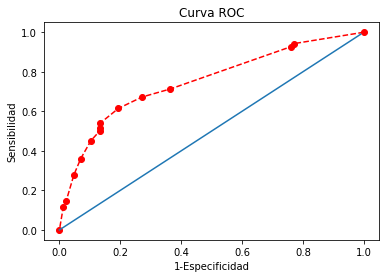

In [298]:
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker = "o", linestyle = "--", color="r")
x=[i*0.01 for i in range(0,100)]
y=[i*0.01 for i in range(0,100)]
plt.plot(x,y)
plt.xlabel("1-Especificidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

In [122]:
from sklearn import metrics
from ggplot import *

In [124]:
espec_1, sensit, _ = metrics.roc_curve(Y_test, prob) # División en thresholds de 0.01

Text(0.5, 1.0, 'Curva ROC')

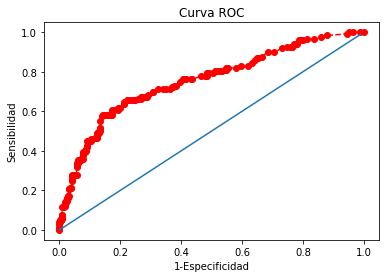

In [185]:
%matplotlib inline
plt.plot(espec_1, sensit, marker = "o", linestyle = "--", color="r")
x=[i*0.01 for i in range(0,100)]
y=[i*0.01 for i in range(0,100)]
plt.plot(x,y)
plt.xlabel("1-Especificidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

In [125]:
espec_1

array([0.        , 0.        , 0.        , 0.        , 0.00179533,
       0.00179533, 0.00359066, 0.005386  , 0.00628366, 0.00628366,
       0.00718133, 0.00718133, 0.00807899, 0.00807899, 0.00897666,
       0.00897666, 0.01615799, 0.01615799, 0.01795332, 0.01885099,
       0.01885099, 0.01974865, 0.01974865, 0.02154399, 0.02154399,
       0.02423698, 0.02423698, 0.02603232, 0.02603232, 0.02782765,
       0.02782765, 0.02872531, 0.03052065, 0.03052065, 0.03231598,
       0.03590664, 0.03680431, 0.03859964, 0.04039497, 0.04039497,
       0.04129264, 0.04129264, 0.04219031, 0.04937163, 0.05206463,
       0.05655296, 0.05655296, 0.05745063, 0.05834829, 0.05834829,
       0.06104129, 0.06104129, 0.06193896, 0.06193896, 0.06732496,
       0.06912029, 0.07001795, 0.07001795, 0.07091562, 0.07271095,
       0.07360862, 0.07630162, 0.07630162, 0.07719928, 0.07899461,
       0.07899461, 0.08258528, 0.08258528, 0.08348294, 0.08797127,
       0.08797127, 0.08976661, 0.08976661, 0.09156194, 0.09156

In [126]:
sensit

array([0.        , 0.00819672, 0.02459016, 0.04098361, 0.04098361,
       0.04918033, 0.04918033, 0.04918033, 0.04918033, 0.05737705,
       0.05737705, 0.06557377, 0.06557377, 0.07377049, 0.07377049,
       0.1147541 , 0.1147541 , 0.12295082, 0.12295082, 0.12295082,
       0.13114754, 0.13114754, 0.13934426, 0.13934426, 0.14754098,
       0.14754098, 0.1557377 , 0.1557377 , 0.16393443, 0.16393443,
       0.17213115, 0.17213115, 0.17213115, 0.20491803, 0.20491803,
       0.21311475, 0.21311475, 0.21311475, 0.24590164, 0.25409836,
       0.26229508, 0.2704918 , 0.27868852, 0.27868852, 0.27868852,
       0.27868852, 0.31967213, 0.32786885, 0.32786885, 0.33606557,
       0.33606557, 0.3442623 , 0.3442623 , 0.35245902, 0.35245902,
       0.35245902, 0.35245902, 0.36065574, 0.36065574, 0.36065574,
       0.36065574, 0.36065574, 0.37704918, 0.3852459 , 0.3852459 ,
       0.39344262, 0.39344262, 0.40163934, 0.40163934, 0.40163934,
       0.40983607, 0.41803279, 0.42622951, 0.42622951, 0.45081

In [153]:
df = pd.DataFrame({
    "1-Especificidad": espec_1,
    "Sensivilidad": sensit
})
df.head()

,1-Especificidad,Sensivilidad
0,0.000000,0.000000
1,0.000000,0.008197
2,0.000000,0.024590
3,0.000000,0.040984
4,0.001795,0.040984


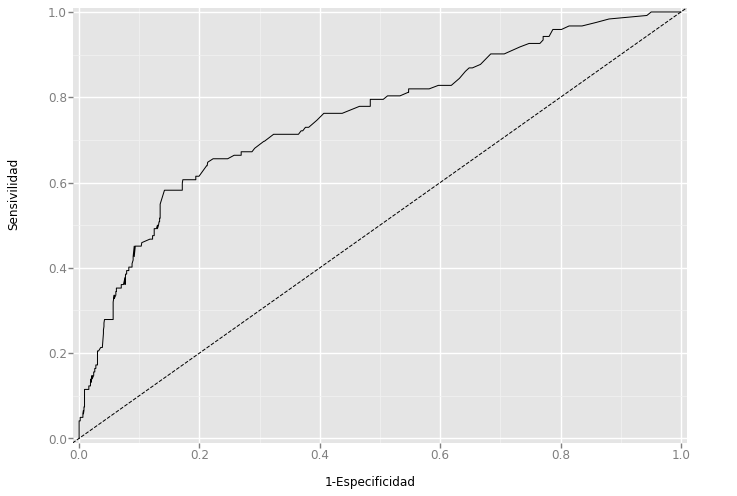

<ggplot: (157327075642)>

In [154]:
ggplot(df, aes(x="1-Especificidad", y="Sensivilidad"))+geom_line()+ geom_abline(linetype="dashed")+xlim(-0.01,1.01)+ylim(-0.01,1.01)

In [155]:
auc = metrics.auc(espec_1, sensit)
auc # Area under curve, un valor de 0.75 es bastante bueno

0.7541130764929217

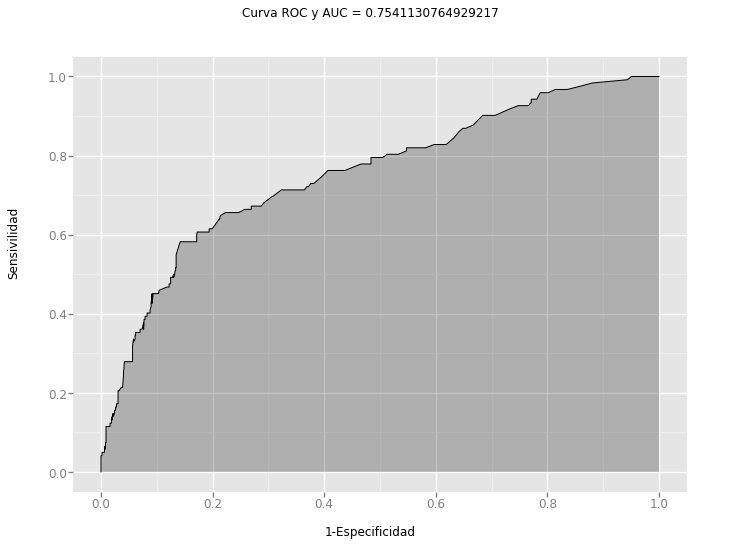

<ggplot: (157327099429)>

In [156]:
ggplot(df, aes(x="1-Especificidad", y="Sensivilidad")) + geom_area(alpha=0.3) + geom_line(aes(y="Sensivilidad"))+ggtitle("Curva ROC y AUC = %s" %str(auc))